In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [52]:
# Cargamos en memoria el csv de transacciones. Para mayor detalle del schema acceder a https://ethereum-etl.readthedocs.io/en/latest/schema/
transactions = pd.read_csv('transactions.csv')

In [58]:
# Se calcula la fecha y hora utilizando el timestamp
transactions['block_timestamp'] = pd.to_datetime(transactions['block_timestamp'], unit='s', utc=True)

# Top 5 de addresses con mayor cantidad de tx enviadas
top_senders = transactions['from_address'].value_counts().head(5)

# Top 5 de addresses con mayor cantidad de tx recibidas
top_receivers = transactions['to_address'].value_counts().head(5)

# Min, max, promedio de LAC enviado (formateado)
transactions['value_ether'] = transactions['value'].astype('float') / 1e18
min_value = transactions['value_ether'].min()
max_value = transactions['value_ether'].max()
avg_value = transactions['value_ether'].mean()

# Cant total y promedio de addresses diferentes (sin importar si son from o to) que tuvieron movimiento
total_unique_addresses = pd.unique(transactions[['from_address', 'to_address']].values.ravel()).size
total_unique_addresses = pd.unique(transactions[['from_address', 'to_address']].values.ravel()).size
average_unique_addresses_per_day = transactions.groupby(transactions['block_timestamp'].dt.date).apply(lambda x: pd.unique(x[['from_address', 'to_address']].values.ravel()).size).mean()


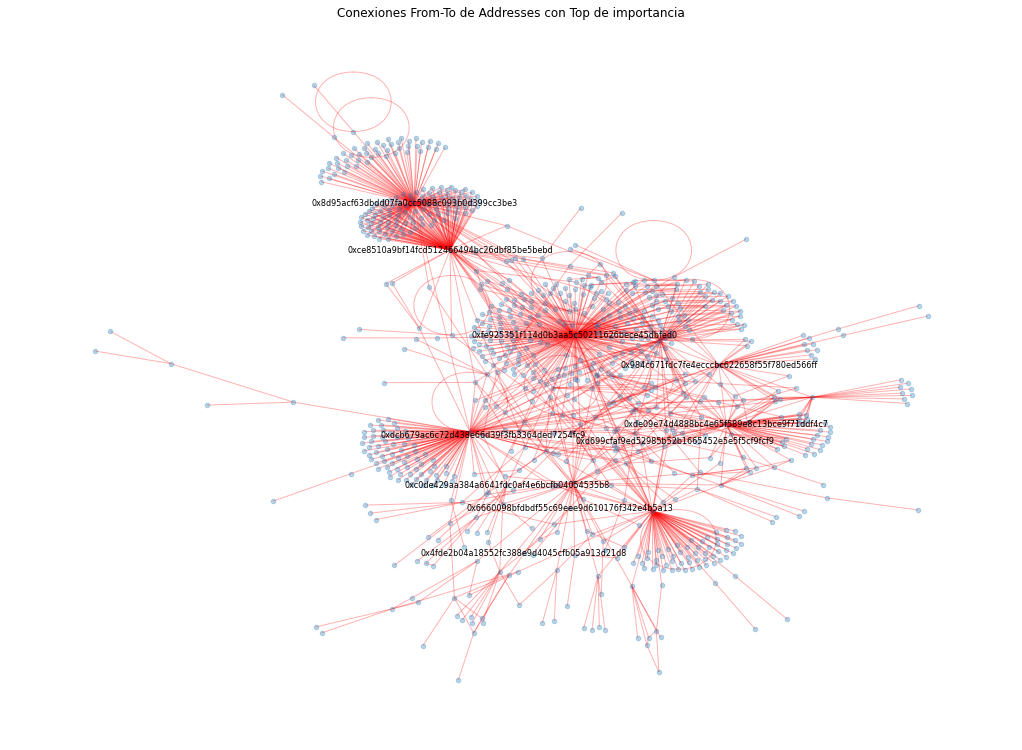

In [21]:
# Grafo con las conexiones entre las addresses con el from-to de las transacciones
G = nx.from_pandas_edgelist(transactions, 'from_address', 'to_address') 
plt.figure(figsize=(14, 10))

# Se dibujan los nodos
pos = nx.spring_layout(G, k=0.05)
nx.draw(G, pos, with_labels=False, node_size=20, edge_color='r', alpha=0.3)

# Se escriben los labels con los addresses más importantes (enviados y recibidos)
important_wallets = set(top_senders.index[:5]).union(set(top_receivers.index[:5]))
labels = {wallet: wallet for wallet in important_wallets}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title('Conexiones From-To de Addresses con Top de importancia')
plt.show()

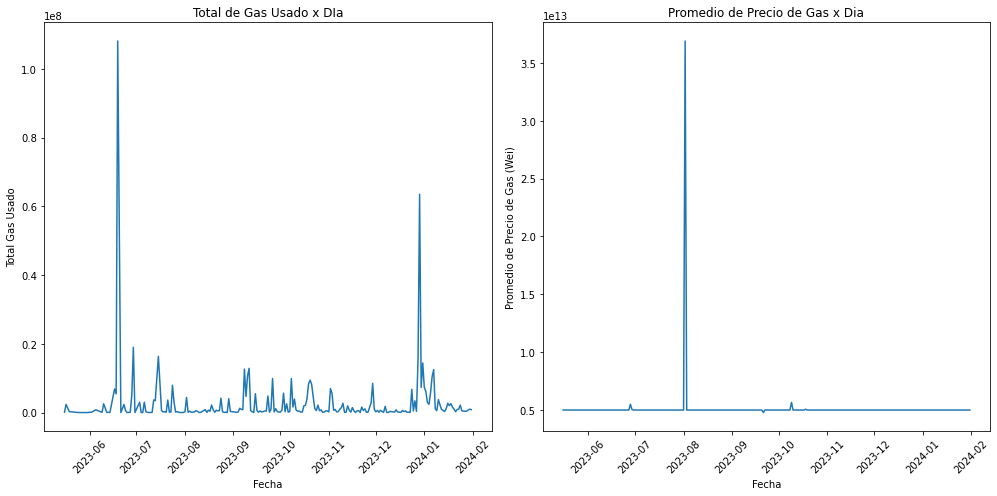

In [22]:
# Gas y Gas price x dia
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
transactions.groupby(transactions['block_timestamp'].dt.date)['gas'].sum().plot()
plt.title('Total Gas Used Over Time')
plt.title('Total de Gas Usado x DIa')
plt.xlabel('Fecha')
plt.ylabel('Total Gas Usado')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
transactions.groupby(transactions['block_timestamp'].dt.date)['gas_price'].mean().plot()
plt.title('Promedio de Precio de Gas x Dia')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precio de Gas (Wei)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
max_gas_tx = transactions.loc[transactions['gas_price'].idxmax()]
max_gas_tx

hash                        0x4495e7eac08b72d6a6aac280ea4c88a151a15b066726...
nonce                                                                       0
block_hash                  0xfad3a39099a812c05c3a777460c7a1e3291928ddc451...
block_number                                                          1653566
transaction_index                                                           0
from_address                       0xa2bbcb80b0281810542c04d32fe441723d68ca7c
to_address                         0xa2bbcb80b0281810542c04d32fe441723d68ca7c
value                                                                       0
gas                                                                     50000
gas_price                                                    1000000000000000
input                                                                      0x
block_timestamp                                     2023-08-02 11:50:26+00:00
max_fee_per_gas                                                 

In [32]:
print('Tabla de Mayores generadores de transacciones')
print(top_senders)
print('\nTabla de Mayores recibidores de transacciones')
print(top_receivers)

Tabla de Mayores generadores de transacciones
0x6660098bfdbdf55c69eee9d610176f342e4b5a13    659
0x984c671fdc7fe4ecccbc622658f55f780ed566ff    590
0xfe925351f114d0b3aa5c50211626bece45dbfed0    401
0xc0de429aa384a6641fdc0af4e6bcfb04054535b8    205
0x8d95acf63dbdd07fa0cc5088c093b0d399cc3be3    164
Name: from_address, dtype: int64

Tabla de Mayores recibidores de transacciones
0xde09e74d4888bc4e65f589e8c13bce9f71ddf4c7    775
0x4fde2b04a18552fc388e9d4045cfb05a913d21d8    653
0xdcb679ac6c72d438e66d39f3fb3364ded7254fc9    191
0xce8510a9bf14fcd512466494bc26dbf85be5bebd    128
0xd699cfaf9ed52985b52b1665452e5e5f5cf9fcf9    117
Name: to_address, dtype: int64


In [15]:
max_gas_tx = transactions.loc[transactions['gas'].idxmax()]
max_gas_tx

hash                        0x3988f29b6fd89a714612dbb9b314e4ffa839dffc5c70...
nonce                                                                       2
block_hash                  0xaaef65f4d19d6b17ead1a5a93f46479841e4463c90cb...
block_number                                                           678210
transaction_index                                                           0
from_address                       0x623fb5ff84192947e8908ff6b3624c89216eb7a0
to_address                         0x2900258eb6dbdcd8648a259a941dbef080b85cf9
value                                                       20000000000000000
gas                                                                  28500000
gas_price                                                       5000000000000
input                       0xb84b0431000000000000000000000000000000000000...
block_timestamp                                     2023-06-19 18:10:40+00:00
max_fee_per_gas                                                 

In [34]:
print(f"Mayor cantidad de LAC enviado en una Tx: {max_value} LAC")
print(f"Menor cantidad de LAC enviado en una Tx: {min_value} LAC")
print(f"Promedio de cantidad de LAC enviado en una Tx: {avg_value} LAC")

Mayor cantidad de LAC enviado en una Tx: 2000000.0 LAC
Menor cantidad de LAC enviado en una Tx: 0.0 LAC
Promedio de cantidad de LAC enviado en una Tx: 2366.5522603517566 LAC


/var/folders/v8/qbhfywjj29x_mwp_gsm98j900000gn/T/ipykernel_13574/3583800949.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  addresses_count_per_day = transactions.groupby(transactions['block_timestamp'].dt.date)['from_address', 'to_address'].agg(lambda x: x.nunique()).sum(axis=1)


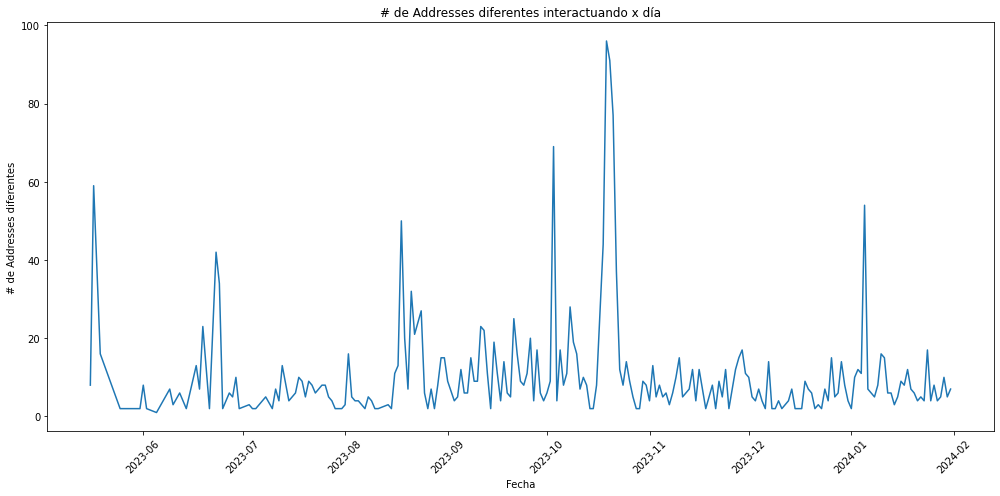

In [59]:

# Gráfico de cantidad de addresses diferentes (incluyendo from o to) x día.
# No son primeras apariciones, sino apariciones diferentes por día
addresses_count_per_day = transactions.groupby(transactions['block_timestamp'].dt.date)['from_address', 'to_address'].agg(lambda x: x.nunique()).sum(axis=1)
addresses_count_per_day.plot(kind='line', figsize=(14, 7))
plt.title('Cantidad de addresses diferentes x día')
plt.title('# de Addresses diferentes interactuando x día')
plt.xlabel('Fecha')
plt.ylabel('# de Addresses diferentes')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [50]:
print(f"Han interactuado en Lachain un total de {total_unique_addresses} addresses")
print(f"Por día interactuan un promedio de {average_unique_addresses_per_day} addresses")

Han interactuado en Lachain un total de 830 addresses
Por día interactuan un promedio de 9.393013100436681 addresses
